#Data

https://www.fao.org/faostat/en/#data/FS
Definitions, Standards, Metadata - https://www.fao.org/faostat/en/#data/FS

In [65]:
#Libs
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

#load dataset 
data=pd.read_csv('FAOSTAT_data_en_4-12-2025.csv')

data['Year'].unique()

array(['2000-2002', '2001-2003', '2002-2004', '2003-2005', '2004-2006',
       '2005-2007', '2006-2008', '2007-2009', '2008-2010', '2009-2011',
       '2010-2012', '2011-2013', '2012-2014', '2013-2015', '2014-2016',
       '2015-2017', '2016-2018', '2017-2019', '2018-2020', '2019-2021',
       '2020-2022', '2021-2023', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'], dtype=object)

In [66]:
# Make a copy of the original year column to preserve raw values (optional but helpful)
data['Year_raw'] = data['Year']

# Define the function to convert a year range to its middle year
def get_middle_year(year_str):
    try:
        if isinstance(year_str, str) and '-' in year_str:
            start_year, end_year = map(int, year_str.split('-'))
            return start_year + ((end_year - start_year) // 2)
        elif isinstance(year_str, str):
            return int(year_str.strip())
        else:
            return int(year_str)  # in case it's already numeric
    except Exception as e:
        print(f"Error parsing year: {year_str} – {e}")
        return None  # or np.nan

# Apply it safely
data['Year'] = data['Year'].apply(get_middle_year)

# Clean Value
def clean_value(value):
    if isinstance(value, str):
        if value.startswith('<') or value.startswith('>'):
            # Assume values like '<0.1' to be '0.1' for simplicity
            return float(value[1:].strip())
        return float(value.strip())
    return value
data['Value'] = data['Value'].apply(clean_value)

print(data)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45901 entries, 0 to 45900
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       45901 non-null  object 
 1   Domain            45901 non-null  object 
 2   Area Code (M49)   45901 non-null  int64  
 3   Area              45901 non-null  object 
 4   Element Code      45901 non-null  int64  
 5   Element           45901 non-null  object 
 6   Item Code         45901 non-null  object 
 7   Item              45901 non-null  object 
 8   Year Code         45901 non-null  int64  
 9   Year              45901 non-null  int64  
 10  Unit              45901 non-null  object 
 11  Value             28907 non-null  float64
 12  Flag              45901 non-null  object 
 13  Flag Description  45901 non-null  object 
 14  Note              6330 non-null   object 
 15  Year_raw          45901 non-null  object 
dtypes: float64(1), int64(4), object(11)
memo

In [68]:
data['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2000, 2023])

In [69]:
# data['Item'].unique()

# Get unique items and sort them alphabetically
unique_items = sorted(data['Item'].unique())

# Print each item with a number
for i, item in enumerate(unique_items, start=1):
    print(f"{i}. {item}")


1. Number of children under 5 years affected by wasting (million)
2. Number of children under 5 years of age who are stunted (modeled estimates) (million)
3. Number of people undernourished (million) (3-year average)
4. Number of severely food insecure female adults (million) (3-year average)
5. Number of severely food insecure male adults (million) (3-year average)
6. Number of severely food insecure people (million) (3-year average)
7. Number of women of reproductive age (15-49 years) affected by anemia (million)
8. Percentage of children under 5 years affected by wasting (percent)
9. Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)
10. Prevalence of anemia among women of reproductive age (15-49 years) (percent)
11. Prevalence of severe food insecurity in the female adult population (percent) (3-year average)
12. Prevalence of severe food insecurity in the male adult population (percent) (3-year average)
13. Prevalence of severe food insecuri

# Story 1
## Global Prevalence of Undernourishment

In [70]:
import matplotlib.pyplot as plt

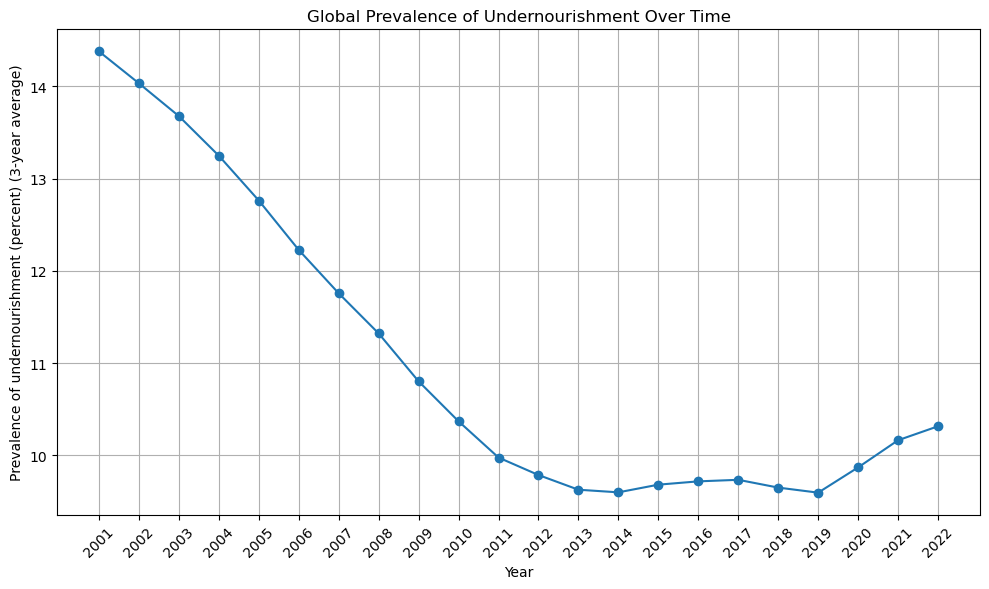

In [71]:
# Filtering and calculating global average for undernourishment

undernourishment_data = data[data['Item'] == 'Prevalence of undernourishment (percent) (3-year average)']
global_avg = undernourishment_data.groupby('Year')['Value'].mean().reset_index()

#matplotlib

plt.figure(figsize=(10,6))
plt.plot(global_avg['Year'], global_avg['Value'], marker = 'o', linestyle = '-')
plt.xlabel('Year')
plt.ylabel('Prevalence of undernourishment (percent) (3-year average)')
plt.title('Global Prevalence of Undernourishment Over Time')
plt.grid(True)

#COrrecting display
plt.xticks(global_avg['Year'], rotation=45)

plt.tight_layout()
plt.show()



According to the UN, the number of hunger people increased during the pandemic, Covid-19. 

In [72]:
# Region mapping
region_map = {
    # Southeast Asia
    'Indonesia': 'Southeast Asia', 'Malaysia': 'Southeast Asia', 'Thailand': 'Southeast Asia',
    'Vietnam': 'Southeast Asia', 'Philippines': 'Southeast Asia', 'Myanmar': 'Southeast Asia',
    
    # East Asia
    'China': 'East Asia', 'Japan': 'East Asia', 'South Korea': 'East Asia', 'Mongolia': 'East Asia',
    
    # Sub-Saharan Africa
    'Nigeria': 'Sub-Saharan Africa', 'Kenya': 'Sub-Saharan Africa', 'Ethiopia': 'Sub-Saharan Africa',
    'Tanzania': 'Sub-Saharan Africa', 'Uganda': 'Sub-Saharan Africa', 'Ghana': 'Sub-Saharan Africa',
    
    # Western Europe
    'France': 'Western Europe', 'Germany': 'Western Europe', 'Italy': 'Western Europe',
    'Spain': 'Western Europe', 'United Kingdom': 'Western Europe',
    
    # Eastern Europe
    'Poland': 'Eastern Europe', 'Ukraine': 'Eastern Europe', 'Romania': 'Eastern Europe',
    
    # North America
    'United States of America': 'North America', 'Canada': 'North America',
    
    # Latin America
    'Brazil': 'Latin America', 'Mexico': 'Latin America', 'Argentina': 'Latin America',
    
    # South Asia
    'India': 'South Asia', 'Pakistan': 'South Asia', 'Bangladesh': 'South Asia', 'Nepal': 'South Asia',
    
    # Middle East
    'Iran': 'Middle East', 'Iraq': 'Middle East', 'Saudi Arabia': 'Middle East',
}

# Add 'Region' column
undernourishment_data = undernourishment_data.copy()  # ensure you're working with a copy
undernourishment_data.loc[:, 'Region'] = undernourishment_data['Area'].map(region_map)


# Drop areas with no region assigned
regional_data = undernourishment_data.dropna(subset=['Region'])

# Compute regional average
regional_avg = regional_data.groupby(['Region', 'Year'])['Value'].mean().reset_index()

# Preview result
regional_avg.head(10)

,Region,Year,Value
0,East Asia,2001,14.333333
1,East Asia,2002,13.933333
2,East Asia,2003,13.766667
3,East Asia,2004,13.433333
4,East Asia,2005,12.766667
5,East Asia,2006,11.800000
6,East Asia,2007,10.766667
7,East Asia,2008,9.466667
8,East Asia,2009,8.600000
9,East Asia,2010,7.600000


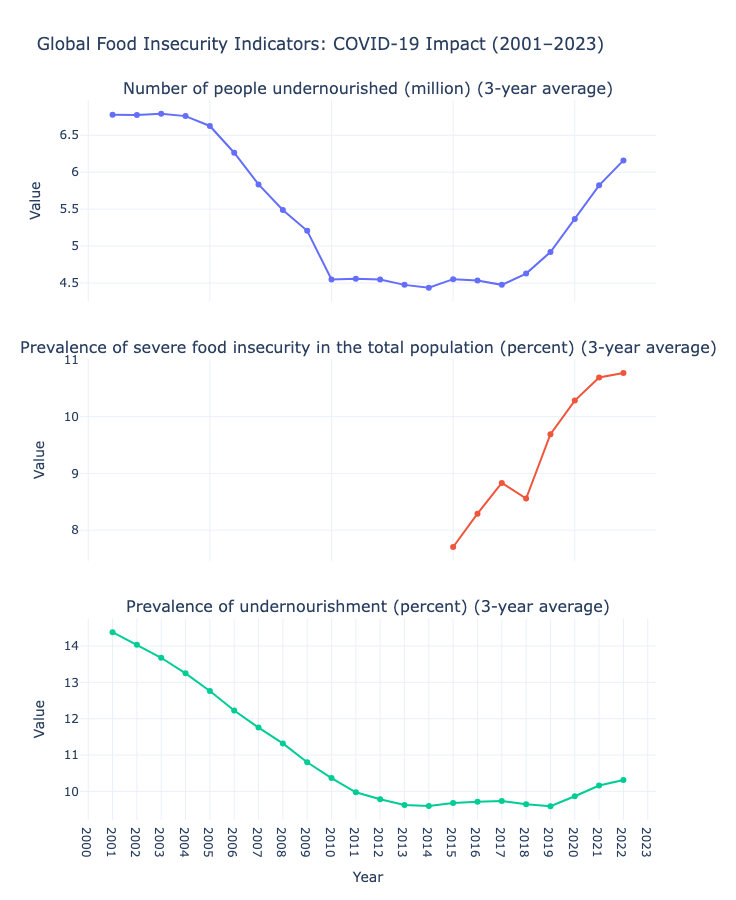

In [78]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define key items for the pandemic-era hunger story
story_items = [
    'Number of people undernourished (million) (3-year average)',
    'Prevalence of severe food insecurity in the total population (percent) (3-year average)',
    'Prevalence of undernourishment (percent) (3-year average)'
]

# Filter and group the data
story_data = data[data['Item'].isin(story_items)]
story_trends = story_data.groupby(['Year', 'Item'])['Value'].mean().reset_index()

# Create subplots dashboard
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.08,
    subplot_titles=story_items
)

# Add each indicator as a separate subplot
for i, item in enumerate(story_items, start=1):
    df_item = story_trends[story_trends['Item'] == item]
    fig.add_trace(
        go.Scatter(
            x=df_item['Year'],
            y=df_item['Value'],
            mode='lines+markers',
            name=item,
            marker=dict(symbol='circle'),
            hovertemplate='Year: %{x}<br>Value: %{y:.2f}<extra></extra>'
        ),
        row=i, col=1
    )

# Layout adjustments
fig.update_layout(
    height=900,
    title="Global Food Insecurity Indicators: COVID-19 Impact (2001–2023)",
    hovermode='x unified',
    showlegend=False,
    template='plotly_white'
)

fig.update_xaxes(title_text="Year", dtick=1, row=3, col=1)
fig.update_yaxes(title_text="Value")

fig.show()


In [74]:
import pandas as pd
import plotly.express as px

# Filter for just the one item
selected_item = 'Prevalence of undernourishment (percent) (3-year average)'
filtered_data = data[data['Item'] == selected_item].copy()

# Map regions and drop NaNs
filtered_data['Region'] = filtered_data['Area'].map(region_map)
filtered_data = filtered_data.dropna(subset=['Region'])

# Group by Region and Year
regional_avg = filtered_data.groupby(['Region', 'Year'])['Value'].mean().reset_index()

# Plot
fig = px.line(
    regional_avg,
    x='Year',
    y='Value',
    color='Region',
    title='Prevalence of Undernourishment (%): Regional Trends (2001–2023)',
    labels={'Value': 'Prevalence (%)', 'Region': 'Region'},
    markers=True
)

fig.update_layout(
    height=600,
    xaxis=dict(dtick=1),
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


In [75]:
data['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Sa

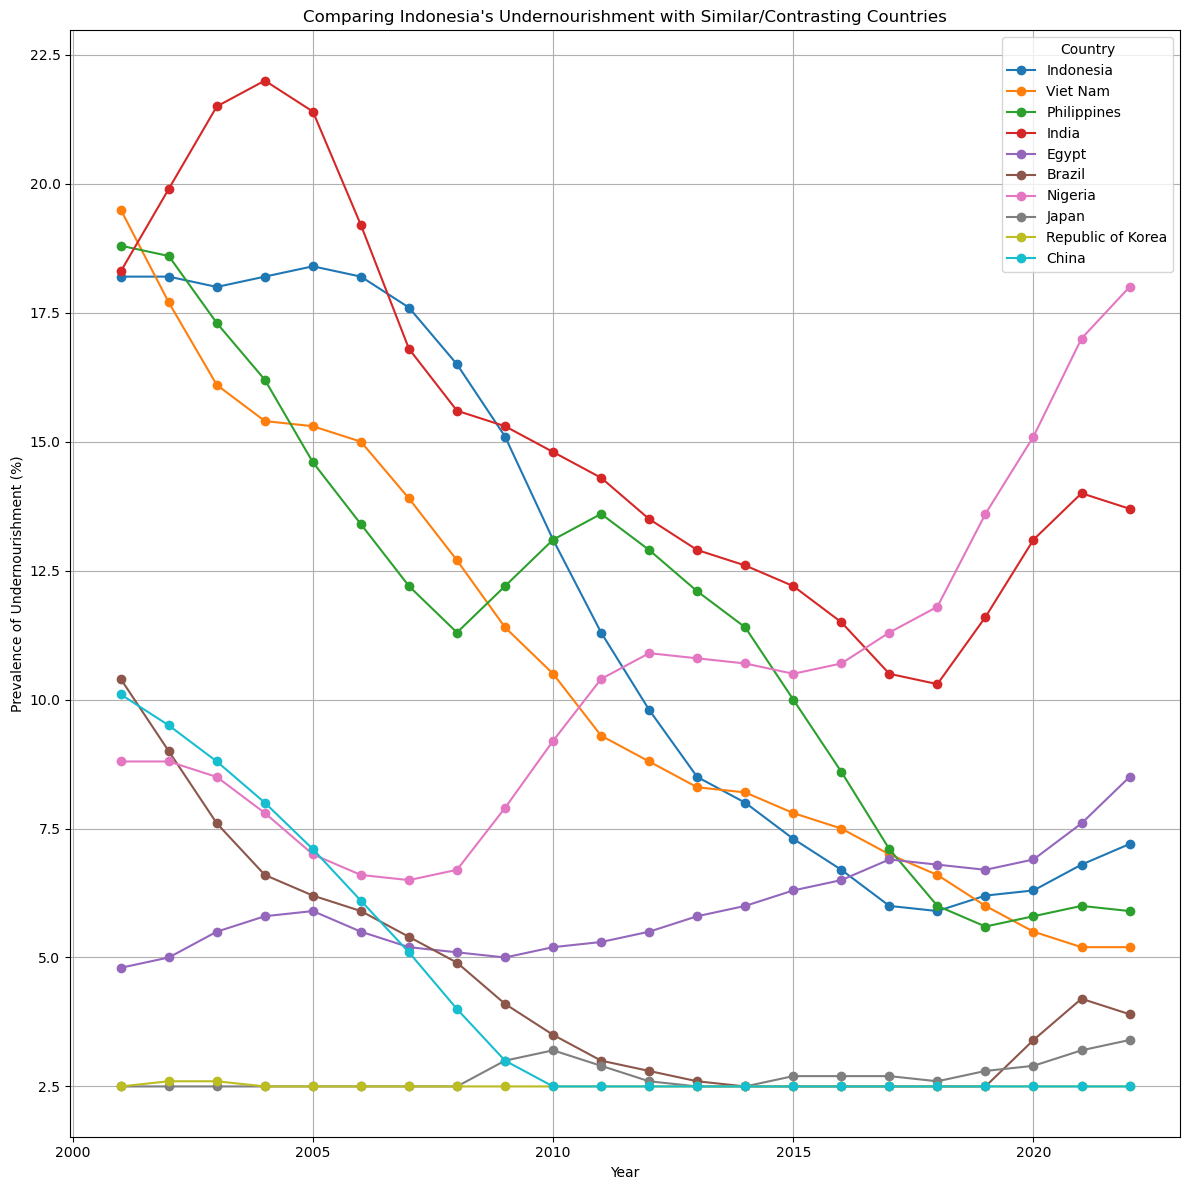

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Smart comparison set based on economic/institutional rationale
selected_countries = [
    'Indonesia',         # Main focus
    'Viet Nam',           # Similar development model (export-led, stable, promising GDP growth)
    'Philippines',       # Regional peer with similar issues
    'India',             # Population size, democratic but uneven development
    'Egypt', 'Brazil',            # Middle-income, governance challenges
    'Nigeria',           # Similar population size, resource-rich, institutional struggles
    'Japan',  'Republic of Korea',           # Contrast: Agrarian Reform post World War II, high-performing
    'China'               # Contrast: authoritarian development model
]

# Filter data
selected_data = data[
    (data['Area'].isin(selected_countries)) &
    (data['Item'] == 'Prevalence of undernourishment (percent) (3-year average)')
]

# Prepare data for plotting
country_avg = selected_data.groupby(['Year', 'Area'])['Value'].mean().unstack()

# Plot
plt.figure(figsize=(12, 12))
for country in selected_countries:
    if country in country_avg.columns:
        plt.plot(country_avg.index, country_avg[country], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Prevalence of Undernourishment (%)')
plt.title('Comparing Indonesia\'s Undernourishment with Similar/Contrasting Countries')
plt.legend(title='Country', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


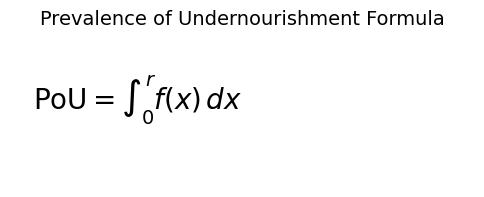

In [77]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6, 2))
plt.text(0.05, 0.5, r"$\mathrm{PoU} = \int_{0}^{r} f(x) \, dx$", fontsize=20)
plt.axis('off')
plt.title("Prevalence of Undernourishment Formula", fontsize=14)
plt.show()


The questions:

1. Negara dengan GDP tinggi tapi Prevalence of Undernourishment. - the development is somewhat not inclusive
2. undernourished > lower productivity > hindering accumulated know-how in the long run > middle income trap?
3. Fiscal policy: subsidi pangan, BLT, intervensi harga
4. SDG target 2.1: End hunger and ensure access to safe, nutious, and sufficient food all year round



## Simulasi Distribusi Kalori


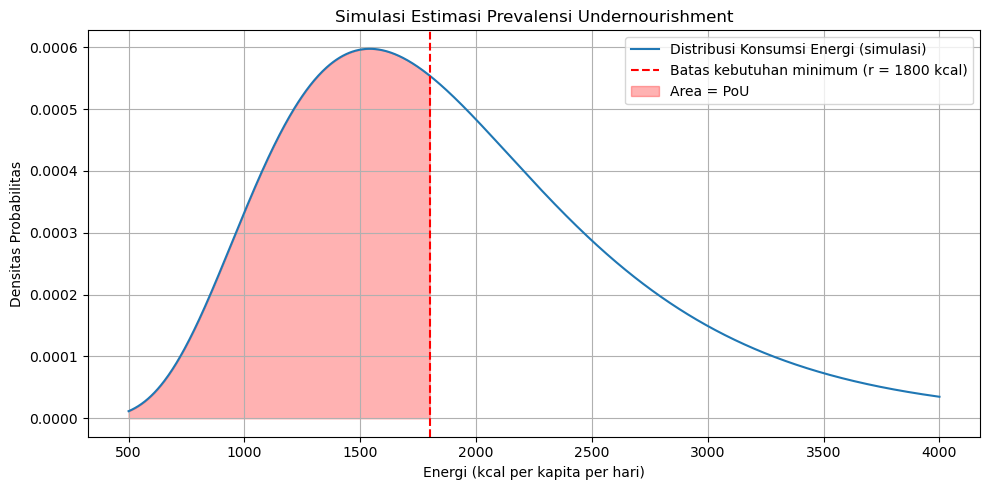

In [79]:
import numpy as np
from scipy.stats import lognorm

# Simulasi data konsumsi energi (dalam kcal)
np.random.seed(42)
mu, sigma = 7.5, 0.4  # log-normal params → mean ~ 2000 kcal
x = np.linspace(500, 4000, 1000)
pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))

# Threshold kebutuhan energi minimal
r = 1800

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, pdf, label='Distribusi Konsumsi Energi (simulasi)')
plt.axvline(r, color='red', linestyle='--', label='Batas kebutuhan minimum (r = 1800 kcal)')
plt.fill_between(x, 0, pdf, where=(x < r), color='red', alpha=0.3, label='Area = PoU')
plt.xlabel('Energi (kcal per kapita per hari)')
plt.ylabel('Densitas Probabilitas')
plt.title('Simulasi Estimasi Prevalensi Undernourishment')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
